In [1]:
from typeguard.importhook import install_import_hook
install_import_hook('repl')

In [4]:
%autoreload 2

In [5]:
from pmextract import extract # ask Sam for this tool
import pdb

In [6]:
from policies import MinimaxPolicy, RandPolicy
import game
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def rand_game():
    players = [RandPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=800)
    sim.run()
    return sim

In [17]:
rand_games = [rand_game() for _ in range(50)]

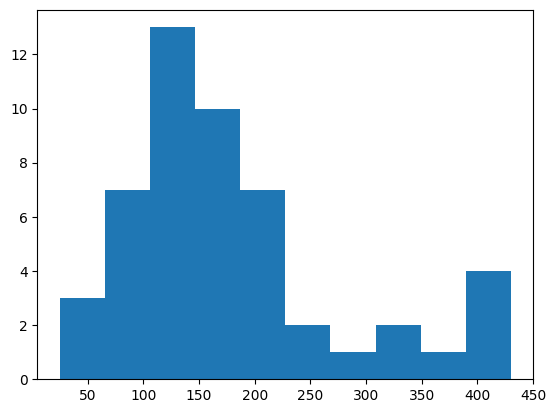

In [22]:
plt.hist([g.current_round for g in rand_games]);

In [27]:
np.mean([g.current_round % 2 for g in rand_games])

0.62

In [30]:
def minimax_rand():
    players = [MinimaxPolicy(0), RandPolicy(1)]
    sim = game.GameSimulator(players, n_steps=700)
    sim.run()
    return sim

In [31]:
mm_games = [minimax_rand() for _ in range(20)]

In [32]:
np.mean([g.winner() for g in mm_games])

0.1

So Minimax, even with depth 3 and no hueristic, is already way better than random!

In [24]:
def minimax_game():
    players = [MinimaxPolicy(0), MinimaxPolicy(1)]
    sim = game.GameSimulator(players, n_steps=1000)
    sim.run()